## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>

Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке.

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее.

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф.
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет.


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [151]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

Прочитаем наш файл с исходными данными:

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
taxi_data = pd.read_csv("/content/drive/MyDrive/URFU_2S_PROJECT_PRACTICUM/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.tail()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [154]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок.

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу.

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S').

Определите временные рамки (без учета времени), за которые представлены данные.

In [155]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
print(taxi_data['pickup_datetime'].min()) # Определим минимальную дату
print(taxi_data['pickup_datetime'].max()) # Определим максимальную дату

2016-01-01 00:00:17
2016-06-30 23:59:39


### Задание 2.2
Посмотрим на пропуски.
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [156]:
print(pd.isnull(taxi_data).sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков.

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [157]:
# Для ответа на вопросы выведем основные описательные характеристики
taxi_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [158]:
# Дополнительно определим медианное значение
print(taxi_data['trip_duration'].median())

662.0


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками.


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [159]:
def add_datetime_features(data):
  data['pickup_date'] = data['pickup_datetime'].dt.date
  data['pickup_hour'] = data['pickup_datetime'].dt.hour
  data['pickup_day_of_week'] = data['pickup_datetime'].dt.day_name()
  return data

# Определим количество поездок в субботу
print(add_datetime_features(taxi_data)['pickup_day_of_week'].value_counts()['Saturday'])

# Определим среднее количество поездок в день
print(add_datetime_features(taxi_data)['pickup_date'].value_counts().mean())

220868
8014.527472527472


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет).

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [160]:
holiday_data = pd.read_csv('/content/drive/MyDrive/URFU_2S_PROJECT_PRACTICUM/holiday_data.csv', sep=';')

def add_holiday_features(data, holidays):
  holidays = pd.to_datetime(holiday_data['date'], format='%Y-%m-%d').dt.date.unique()
  taxi_holiday_data = add_datetime_features(data)
  data['pickup_holiday'] = taxi_holiday_data['pickup_date'].apply(lambda x: int(x in holidays))
  return data

taxi_holiday_data = add_holiday_features(taxi_data, holiday_data)

# Определим медианную длительность поездки на такси в праздничные дни
print(taxi_holiday_data[taxi_holiday_data['pickup_holiday'] == 1]['trip_duration'].median())

585.0


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM?

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника.

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [161]:
osrm_data = pd.read_csv('/content/drive/MyDrive/URFU_2S_PROJECT_PRACTICUM/osrm_data_train.csv')

In [162]:
def add_osrm_features(data, osrm_data):
  data = pd.merge(data,
                  osrm_data[['id',
                             'total_distance',
                             'total_travel_time',
                             'number_of_steps']],
                  how="left",
                  on=["id", "id"])
  return data

taxi_data = add_osrm_features(taxi_data, osrm_data)

# Определим разницу (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM
print(taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median())

372.5


In [163]:
#Определим пропуски в данных
print(taxi_data.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_date           0
pickup_hour           0
pickup_day_of_week    0
pickup_holiday        0
total_distance        1
total_travel_time     1
number_of_steps       1
dtype: int64


In [164]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [165]:
def add_geographical_features(data):
  data['haversine_distance'] = get_haversine_distance(data['pickup_latitude'],
                                                      data['pickup_longitude'],
                                                      data['dropoff_latitude'],
                                                      data['dropoff_longitude'])
  data['direction'] = get_angle_direction(data['pickup_latitude'],
                                                      data['pickup_longitude'],
                                                      data['dropoff_latitude'],
                                                      data['dropoff_longitude'])
  return data

In [166]:
taxi_data = add_geographical_features(taxi_data)

In [167]:
taxi_data['haversine_distance'].median()

2.0937171329263693

### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [168]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters = 10, random_state = 42)
kmeans.fit(coords)

# ваш код здесь

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [169]:
def add_cluster_features(data, algorithm):
  predict_data = np.hstack((data[['pickup_latitude', 'pickup_longitude']],
                            data[['dropoff_latitude', 'dropoff_longitude']]))
  data['geo_cluster'] = algorithm.predict(predict_data)
  return data

In [170]:
taxi_data = add_cluster_features(taxi_data, kmeans)
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2016-03-14,17,Monday,0,2009.1,164.9,5.0,1.498521,99.970196,9
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2016-06-12,0,Sunday,0,2513.2,332.0,6.0,1.805507,-117.153768,4
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,2016-01-19,11,Tuesday,0,11060.8,767.6,16.0,6.385098,-159.680165,4
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2016-04-06,19,Wednesday,0,1779.4,235.8,4.0,1.485498,-172.737700,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,2016-03-26,13,Saturday,0,1614.9,140.1,5.0,1.188588,179.473585,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,2016-04-08,13,Friday,0,2234.6,311.7,8.0,1.225080,-119.059338,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,2016-01-10,7,Sunday,0,7638.0,589.6,11.0,6.049836,25.342196,9
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,2016-04-22,6,Friday,0,9871.5,642.9,10.0,7.824606,-150.788492,4
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,2016-01-05,15,Tuesday,0,1628.3,161.6,7.0,1.092564,35.033294,0


In [171]:
taxi_data['geo_cluster'].value_counts()

0    596467
9    383874
4    359233
5     43619
7     41171
3     27022
1      7233
6        18
8         5
2         2
Name: geo_cluster, dtype: int64

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки.

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [172]:
weather_data = pd.read_csv('/content/drive/MyDrive/URFU_2S_PROJECT_PRACTICUM/weather_data.csv')

In [173]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         8787 non-null   object 
 1   temperature  8787 non-null   float64
 2   windchill    2295 non-null   float64
 3   heat index   815 non-null    float64
 4   humidity     8787 non-null   float64
 5   pressure     8556 non-null   float64
 6   dew Point    8787 non-null   float64
 7   visibility   8787 non-null   float64
 8   wind dir     8787 non-null   object 
 9   wind speed   8787 non-null   float64
 10  gust speed   8787 non-null   float64
 11  precip       8787 non-null   float64
 12  events       8787 non-null   object 
 13  conditions   8787 non-null   object 
 14  date         8787 non-null   object 
 15  hour         8787 non-null   int64  
dtypes: float64(10), int64(1), object(5)
memory usage: 1.1+ MB


In [174]:
weather_data['date'] = pd.to_datetime(weather_data['time']).dt.date
weather_data['hour'] = pd.to_datetime(weather_data['time']).dt.hour

In [175]:
columns_to_stay = ['temperature', 'visibility', 'wind speed', 'precip', 'events', 'date', 'hour']
columns_to_drop = [x for x in weather_data.columns if x not in columns_to_stay]
weather_data = weather_data.drop(columns_to_drop, axis = 1)

In [176]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
 12  pickup_hour         1458644 non-null  int64         
 13  pickup_day_o

In [177]:
def add_weather_features(data, weather_data):
  data = pd.merge(data,
                  weather_data,
                  how="left",
                  left_on = ['pickup_date', 'pickup_hour'],
                  right_on = ['date', 'hour'])
  return data

In [178]:
taxi_data = add_weather_features(taxi_data, weather_data)

In [179]:
taxi_data = taxi_data.drop(['date', 'hour'], axis = 1)

In [180]:
taxi_data['events'].value_counts()

None    1375185
Rain      58300
Snow      13126
Fog           1
Name: events, dtype: int64

In [181]:
print(taxi_data.isnull().sum()['temperature'] * 100 / taxi_data.shape[0])

0.8248757064780714


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски.
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана).

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам.

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [182]:
def fill_null_weather_data(data):
  data['temperature'] = data['temperature'].fillna(data.groupby('pickup_date')['temperature'].transform('median'))
  data['visibility'] = data['visibility'].fillna(data.groupby('pickup_date')['visibility'].transform('median'))
  data['wind speed'] = data['wind speed'].fillna(data.groupby('pickup_date')['wind speed'].transform('median'))
  data['precip'] = data['precip'].fillna(data.groupby('pickup_date')['precip'].transform('median'))
  data['events'] = data['events'].fillna('None')
  data['total_distance'] = data['total_distance'].fillna(data['total_distance'].median())
  data['total_travel_time'] = data['total_travel_time'].fillna(data['total_travel_time'].median())
  data['number_of_steps'] = data['number_of_steps'].fillna(data['number_of_steps'].median())
  return data

In [183]:
taxi_data = fill_null_weather_data(taxi_data)

In [184]:
taxi_data['temperature'].median()

11.1

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки.

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа.

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды.
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом:
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


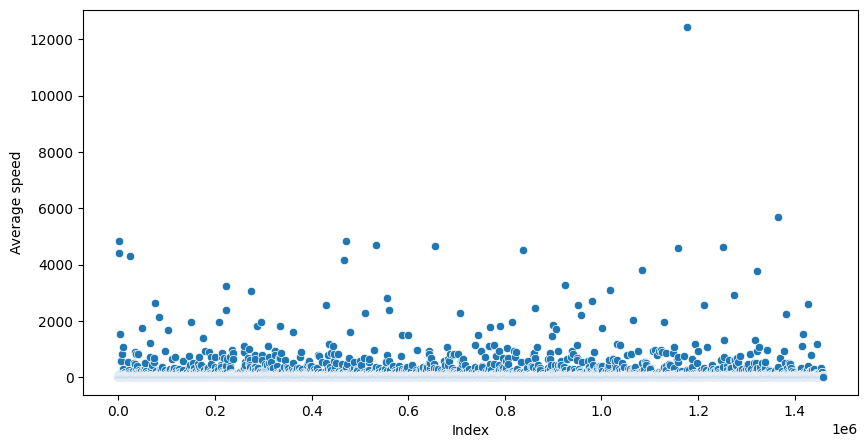

In [185]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч!

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч.


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных.

б) Сколько выбросов по признаку скорости вам удалось найти?

In [186]:
taxi_data[taxi_data['trip_duration']>60*60*24].count()

id                    4
vendor_id             4
pickup_datetime       4
dropoff_datetime      4
passenger_count       4
pickup_longitude      4
pickup_latitude       4
dropoff_longitude     4
dropoff_latitude      4
store_and_fwd_flag    4
trip_duration         4
pickup_date           4
pickup_hour           4
pickup_day_of_week    4
pickup_holiday        4
total_distance        4
total_travel_time     4
number_of_steps       4
haversine_distance    4
direction             4
geo_cluster           4
temperature           4
visibility            4
wind speed            4
precip                4
events                4
dtype: int64

In [187]:
taxi_data = taxi_data.drop(taxi_data[taxi_data['trip_duration']>60*60*24].index, axis = 0)

In [188]:
taxi_data[taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6 > 300].count()

id                    407
vendor_id             407
pickup_datetime       407
dropoff_datetime      407
passenger_count       407
pickup_longitude      407
pickup_latitude       407
dropoff_longitude     407
dropoff_latitude      407
store_and_fwd_flag    407
trip_duration         407
pickup_date           407
pickup_hour           407
pickup_day_of_week    407
pickup_holiday        407
total_distance        407
total_travel_time     407
number_of_steps       407
haversine_distance    407
direction             407
geo_cluster           407
temperature           407
visibility            407
wind speed            407
precip                407
events                407
dtype: int64

In [189]:
taxi_data = taxi_data.drop(taxi_data[taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6 > 300].index, axis = 0)

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных;
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [190]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log).
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным?
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$.

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

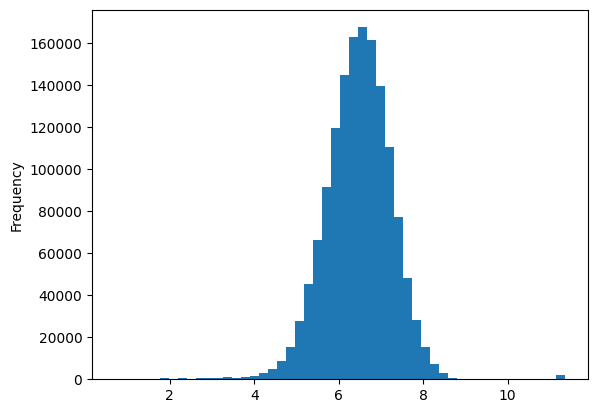

In [191]:
plt.figure();
taxi_data['trip_duration_log'].plot.hist(bins = 50);

In [192]:
k2, p = stats.normaltest(taxi_data['trip_duration_log'])
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

print(p)

The null hypothesis can be rejected
0.0


### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id).

Сравните два распределения между собой.

<Figure size 640x480 with 0 Axes>

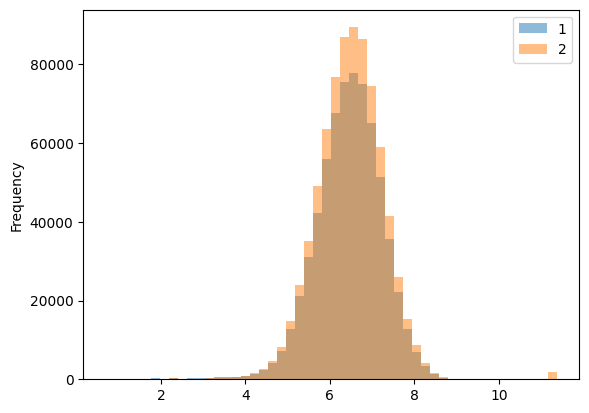

In [193]:
taxi_data_by_vendor = pd.DataFrame(
    {
        "1": taxi_data[taxi_data['vendor_id'] == 1]['trip_duration_log'],
        "2": taxi_data[taxi_data['vendor_id'] == 2]['trip_duration_log'],
    },
    columns=["1", "2"],
)
plt.figure();
taxi_data_by_vendor.plot.hist(alpha=0.5, bins = 50);

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag).

Сравните два распределения между собой.

<Figure size 640x480 with 0 Axes>

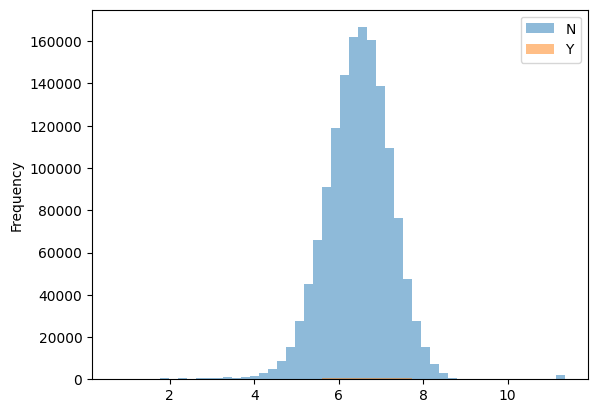

In [194]:
taxi_data_by_flag = pd.DataFrame(
    {
        "N": taxi_data[taxi_data['store_and_fwd_flag'] == 'N']['trip_duration_log'],
        "Y": taxi_data[taxi_data['store_and_fwd_flag'] == 'Y']['trip_duration_log'],
    },
    columns=["N", "Y"],
)
plt.figure();
taxi_data_by_flag.plot.hist(alpha=0.5, bins = 50);

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

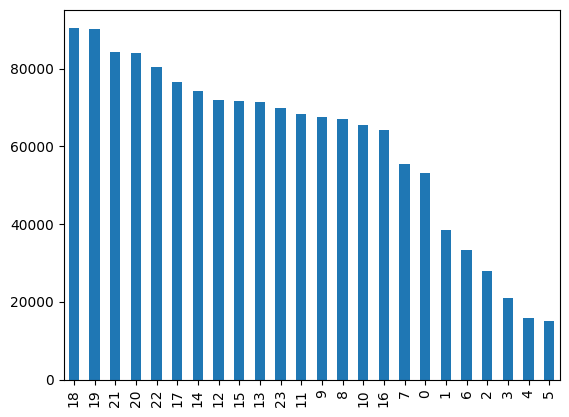

In [195]:
plt.figure();
taxi_data['pickup_hour'].value_counts().plot(kind = 'bar');

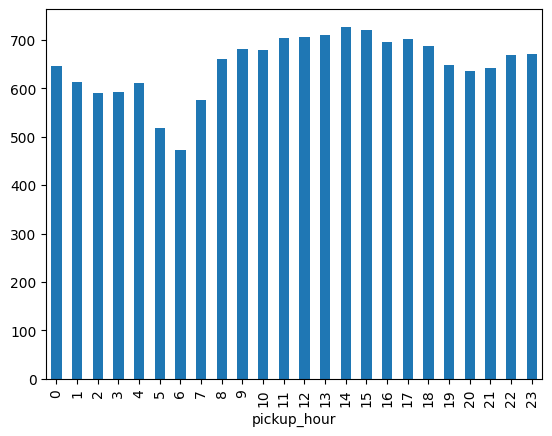

In [196]:
plt.figure();
taxi_data.groupby(by = 'pickup_hour')['trip_duration'].median().plot(kind = 'bar');

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


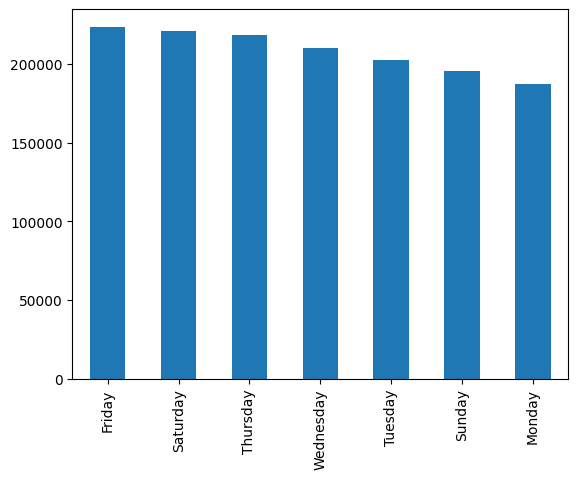

In [197]:
plt.figure();
taxi_data['pickup_day_of_week'].value_counts().plot(kind = 'bar');

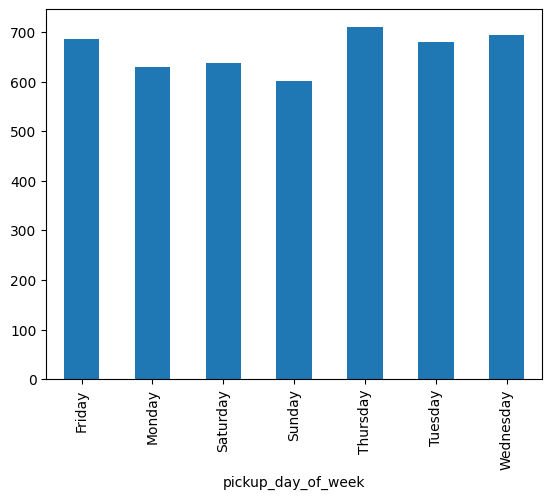

In [198]:
plt.figure();
taxi_data.groupby(by = 'pickup_day_of_week')['trip_duration'].median().plot(kind = 'bar');

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно.

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration).

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

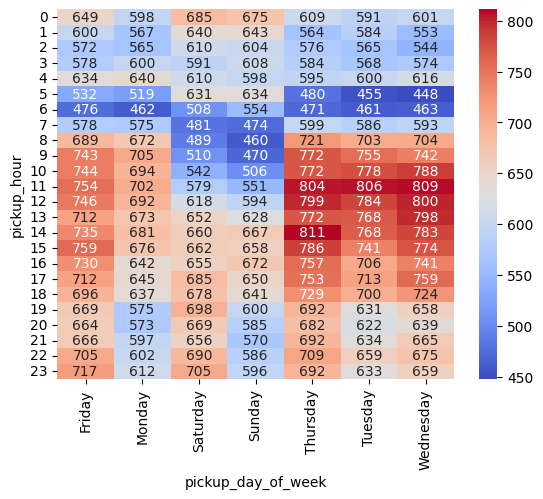

In [199]:
table = pd.pivot_table(taxi_data, values='trip_duration', index=['pickup_hour'],
                       columns=['pickup_day_of_week'], aggfunc = np.median)
sns.heatmap(table, cmap = 'coolwarm', annot = True, fmt=".0f");

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude)
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude).
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:

city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее.

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.


In [200]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

In [201]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458233 entries, 0 to 1458643
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458233 non-null  object        
 1   vendor_id           1458233 non-null  int64         
 2   pickup_datetime     1458233 non-null  datetime64[ns]
 3   dropoff_datetime    1458233 non-null  object        
 4   passenger_count     1458233 non-null  int64         
 5   pickup_longitude    1458233 non-null  float64       
 6   pickup_latitude     1458233 non-null  float64       
 7   dropoff_longitude   1458233 non-null  float64       
 8   dropoff_latitude    1458233 non-null  float64       
 9   store_and_fwd_flag  1458233 non-null  object        
 10  trip_duration       1458233 non-null  int64         
 11  pickup_date         1458233 non-null  object        
 12  pickup_hour         1458233 non-null  int64         
 13  pickup_day_o

In [202]:
taxi_data[taxi_data['pickup_longitude']<-74.03]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,...,2.0,0.000000,0.000000,4,2.8,16.1,5.6,0.0,None,3.332205
3261,id1606138,2,2016-04-27 15:14:54,2016-04-27 15:15:01,2,-74.177780,40.690281,-74.177780,40.690281,N,...,2.0,0.000000,0.000000,4,14.4,16.1,5.6,0.0,None,2.079442
7794,id0688948,1,2016-04-14 20:13:28,2016-04-14 20:13:43,1,-74.161804,40.836494,-74.161804,40.836494,N,...,2.0,0.000000,0.000000,0,12.2,16.1,13.0,0.0,None,2.772589
9827,id1795325,2,2016-04-08 04:23:37,2016-04-08 04:24:06,2,-74.040543,40.717087,-74.040550,40.717091,N,...,2.0,0.000770,-56.587840,4,8.9,16.1,14.8,0.0,None,3.401197
19015,id3330882,2,2016-04-02 08:47:43,2016-04-02 08:50:23,1,-74.073433,40.615421,-74.073433,40.615421,N,...,2.0,0.000000,0.000000,4,11.1,16.1,0.0,0.0,None,5.081404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445912,id1626001,1,2016-04-07 16:51:32,2016-04-07 16:52:41,1,-74.181427,40.687702,-74.181427,40.687698,N,...,2.0,0.000424,180.000000,4,12.8,11.3,13.0,0.3,None,4.248495
1446619,id3331453,2,2016-06-11 09:33:57,2016-06-11 09:36:18,1,-74.071701,40.664028,-74.072227,40.664551,N,...,2.0,0.073134,-37.382457,4,20.0,16.1,0.0,0.0,None,4.955827
1446863,id0414108,2,2016-01-20 11:12:15,2016-01-20 11:12:30,1,-74.177322,40.695068,-74.177322,40.695068,N,...,2.0,0.000000,0.000000,4,-0.6,16.1,14.8,0.0,None,2.772589
1447627,id0938504,2,2016-06-21 22:02:51,2016-06-21 22:03:07,1,-74.356659,40.719189,-74.356659,40.719189,N,...,2.0,0.000000,0.000000,4,26.7,16.1,7.4,0.0,None,2.833213


In [203]:
taxi_data_NY = taxi_data.drop(taxi_data[taxi_data['pickup_longitude']<=-74.03].index, axis = 0)
taxi_data_NY = taxi_data_NY.drop(taxi_data_NY[taxi_data_NY['pickup_longitude']>=-73.75].index, axis = 0)
taxi_data_NY = taxi_data_NY.drop(taxi_data_NY[taxi_data_NY['pickup_latitude']<=40.63].index, axis = 0)
taxi_data_NY = taxi_data_NY.drop(taxi_data_NY[taxi_data_NY['pickup_latitude']>=40.85].index, axis = 0)

taxi_data_NY = taxi_data_NY.drop(taxi_data_NY[taxi_data_NY['dropoff_longitude']<=-74.03].index, axis = 0)
taxi_data_NY = taxi_data_NY.drop(taxi_data_NY[taxi_data_NY['dropoff_longitude']>=-73.75].index, axis = 0)
taxi_data_NY = taxi_data_NY.drop(taxi_data_NY[taxi_data_NY['dropoff_latitude']<=40.63].index, axis = 0)
taxi_data_NY = taxi_data_NY.drop(taxi_data_NY[taxi_data_NY['dropoff_latitude']>=40.85].index, axis = 0)

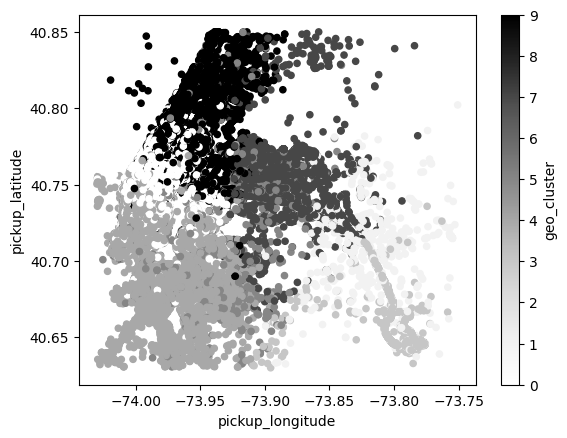

In [204]:
ax1 = taxi_data_NY.plot.scatter(x = 'pickup_longitude',
                      y = 'pickup_latitude',
                      c = 'geo_cluster')

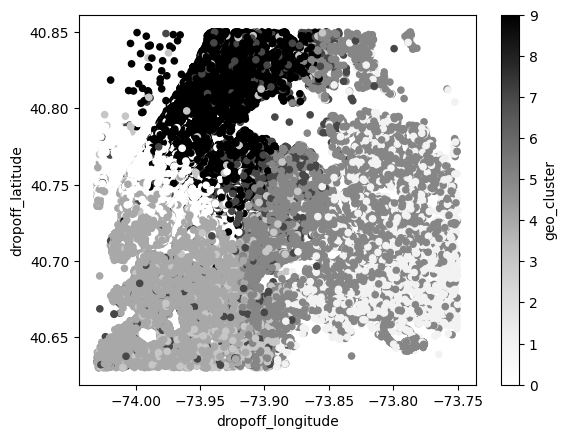

In [205]:
ax1 = taxi_data_NY.plot.scatter(x = 'dropoff_longitude',
                      y = 'dropoff_latitude',
                      c = 'geo_cluster')

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [206]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [207]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках.

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [208]:
drop_columns = ['id', 'dropoff_datetime']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 25)


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [209]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 1, если идентификатор таксопарка равен 0, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 0 в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [210]:
def transform(x):
  if x == 1 or x == 'N': return 0
  else: return 1

In [211]:
train_data['vendor_id'] = train_data['vendor_id'].apply(transform)

In [212]:
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(transform)

In [213]:
print(train_data['vendor_id'].mean())

0.53497486341346


In [214]:
print(train_data['store_and_fwd_flag'].mean())

0.005514207948935458


## В данном коде признак store_and_fwd_flag уже закодирован согласно указанному условию: значение "N" преобразуется в 0, а любое другое значение в 1. Поэтому не требуется дополнительной обработки этого признака.
# Таким образом:
# - среднее по закодированному столбцу vendor_id равно 0.53.
# - среднее по закодированному столбцу store_and_fwd_flag равно 0.006.


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEndoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events.


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [215]:
one_hot_encoder = OneHotEncoder(drop='first').fit(train_data[['pickup_day_of_week', 'geo_cluster', 'events']])
column_names = one_hot_encoder.get_feature_names_out()
data_onehot = one_hot_encoder.transform(train_data[['pickup_day_of_week', 'geo_cluster', 'events']]).toarray()
data_onehot = pd.DataFrame(data_onehot, columns = column_names)
data_onehot

,pickup_day_of_week_Monday,pickup_day_of_week_Saturday,pickup_day_of_week_Sunday,pickup_day_of_week_Thursday,pickup_day_of_week_Tuesday,pickup_day_of_week_Wednesday,geo_cluster_1,geo_cluster_2,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1458229,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1458230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1458231,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Добавим полученную таблицу с закодированными признаками:

In [216]:
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis = 1), data_onehot],
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [217]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log.

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [218]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log,
    test_size=0.33,
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


# Таким образом,  после выполнения кода, описанного в вопросе, была создана таблица data_onehot, содержащая закодированные категориальные признаки pickup_day_of_week, geo_cluster и events. Чтобы определить количество бинарных столбцов, которые были сгенерированы, можно посмотреть на форму таблицы data_onehot и подсчитать количество её столбцов. Вместо N будет указано число столбцов. Это и будет количество бинарных столбцов, сгенерированных с помощью однократного кодирования.

### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [219]:
KBest = SelectKBest(f_regression, k=25).fit(X, y_log)

In [220]:
column_names = KBest.get_feature_names_out()

In [221]:
best_features = KBest.get_feature_names_out()

In [222]:
X_new = pd.DataFrame(KBest.transform(X), columns = column_names)

In [223]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X_new, y_log,
    test_size=0.33,
    random_state=42
)

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов.


# Таким образом, после выполнения кода, обыл проведен отбор признаков на основе обучающей выборки с использованием функции f_regression.

### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [224]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = column_names)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns = column_names)

In [225]:
print(X_valid['vendor_id'].mean())

0.5354341180797852


# Таким образом, после выполнения кода, описанного в вопросе, предикторы в обучающей и валидационной выборках были нормализованы с помощью MinMaxScaler из библиотеки sklearn.

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [226]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977016 entries, 0 to 977015
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   vendor_id                     977016 non-null  float64
 1   passenger_count               977016 non-null  float64
 2   pickup_longitude              977016 non-null  float64
 3   pickup_latitude               977016 non-null  float64
 4   dropoff_longitude             977016 non-null  float64
 5   dropoff_latitude              977016 non-null  float64
 6   store_and_fwd_flag            977016 non-null  float64
 7   pickup_hour                   977016 non-null  float64
 8   pickup_holiday                977016 non-null  float64
 9   total_distance                977016 non-null  float64
 10  total_travel_time             977016 non-null  float64
 11  number_of_steps               977016 non-null  float64
 12  haversine_distance            977016 non-nul

In [227]:
pd.DataFrame(X_valid).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481217 entries, 0 to 481216
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   vendor_id                     481217 non-null  float64
 1   passenger_count               481217 non-null  float64
 2   pickup_longitude              481217 non-null  float64
 3   pickup_latitude               481217 non-null  float64
 4   dropoff_longitude             481217 non-null  float64
 5   dropoff_latitude              481217 non-null  float64
 6   store_and_fwd_flag            481217 non-null  float64
 7   pickup_hour                   481217 non-null  float64
 8   pickup_holiday                481217 non-null  float64
 9   total_distance                481217 non-null  float64
 10  total_travel_time             481217 non-null  float64
 11  number_of_steps               481217 non-null  float64
 12  haversine_distance            481217 non-nul

In [228]:
reg = LinearRegression().fit(X_train, y_train_log)

In [229]:
print(mean_squared_error(y_train_log, reg.predict(X_train))**0.5)
print(mean_squared_error(y_valid_log, reg.predict(X_valid))**0.5)

0.5356435185027016
0.5380984271876291


# Результаты метрики RMSLE для модели линейной регрессии на тренировочной и валидационной выборках показывают, насколько хорошо модель справляется с предсказанием длительности поездок на такси.

# Значение RMSLE равное 0.54 на тренировочной выборке означает, что среднеквадратичная ошибка в предсказании логарифмированной длительности поездок составляет около 0.54. Это говорит о том, что модель достаточно точно предсказывает длительность поездок на тренировочных данных.

# Значение RMSLE равное 0.54 на валидационной выборке указывает на сопоставимую точность предсказаний модели на новых, ранее не виденных данных. Это говорит о том, что модель линейной регрессии хорошо обобщает и способна предсказывать длительность поездок на такси на основе имеющихся факторов.

# В целом, полученные значения метрики RMSLE говорят о том, что модель линейной регрессии достаточно хорошо справляется с задачей предсказания длительности поездок на такси.

### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [230]:
#ниже приведено решение, но для его выполнения не хватает памяти в Google Collab
#poly = PolynomialFeatures(2)
#X_train_poly = poly.fit_transform(X_train)
#X_valid_poly = poly.fit_transform(X_valid)

#reg_poly = LinearRegression().fit(X_train_poly, y_train_log)

#print(mean_squared_error(y_train_log, reg_poly.predict(X_train_poly))**0.5)
#print(mean_squared_error(y_valid_log, reg_poly.predict(X_valid_poly))**0.5)

# В нашем случае выполнение полиномиальной регрессии с полиномиальными признаками второй степени требует большого объема памяти, которого нет в данном окружении. Поэтому мы не можем выполнить указанное решение и рассчитать метрику RMSLE для модели полиномиальной регрессии.

# Однако, чтобы определить наличие признаков переобучения, можно проанализировать разницу между значениями метрики RMSLE на тренировочной и валидационной выборках для модели полиномиальной регрессии. Если значение метрики на тренировочной выборке значительно ниже, чем на валидационной выборке, это может свидетельствовать о переобучении модели.

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [231]:
#ниже приведено решение, но для его выполнения не хватает памяти в Google Collab

#clf = Ridge(alpha=1.0).fit(X_train_poly, y_train_log)

#print(mean_squared_error(y_train_log, clf.predict(X_train_poly))**0.5)
#print(mean_squared_error(y_valid_log, clf.predict(X_valid_poly))**0.5)

# В данном случве также нет достаточного объема памяти, чтобы выполнить полиномиальную регрессию с L2-регуляризацией и рассчитать метрику RMSLE для тренировочной и валидационной выборок.

### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [232]:
regressor = DecisionTreeRegressor(random_state=42).fit(X_train, y_train_log)
print(mean_squared_error(y_train_log, regressor.predict(X_train))**0.5)
print(mean_squared_error(y_valid_log, regressor.predict(X_valid))**0.5)

0.003049191583639303
0.5662791559916917


# Результаты для модели дерева решений на тренировочной и валидационной выборках показывают следующее:

# RMSLE на тренировочной выборке: 0.003
# Это означает, что модель хорошо соответствует тренировочным данным и способна точно предсказывать значения целевой переменной для этих данных. Очень низкое значение RMSLE указывает на низкую ошибку модели на тренировочной выборке.

# RMSLE на валидационной выборке: 0.566
# Значение RMSLE на валидационной выборке выше, чем на тренировочной выборке. Это говорит о том, что модель не так хорошо обобщается на новые данные. Ошибка модели на валидационной выборке выше, что может указывать на переобучение.

# Таким образом, результаты говорят о том, что модель дерева решений может быть переобученной, то есть она слишком точно подстроилась под тренировочные данные и не обобщается хорошо на новые данные. Возможные решения для улучшения модели могут включать уменьшение сложности модели, использование регуляризации или использование других алгоритмов, которые более устойчивы к переобучению.

### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений.

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


In [233]:
max_depths = range(7, 20)

dict = {'max_depth':[],
        'RMSLE_train':[],
        'RMSLE_valid':[]
       }
df = pd.DataFrame(dict)

for i in max_depths:
  regressor = DecisionTreeRegressor(max_depth = i, random_state = 42).fit(X_train, y_train_log)
  df.loc[len(df.index)] = [i,
                           mean_squared_error(y_train_log, regressor.predict(X_train))**0.5,
                           mean_squared_error(y_valid_log, regressor.predict(X_valid))**0.5]

In [234]:
df

,max_depth,RMSLE_train,RMSLE_valid
0,7.0,0.444822,0.447174
1,8.0,0.437048,0.440817
2,9.0,0.430022,0.435937
3,10.0,0.422599,0.431669
4,11.0,0.414765,0.430444
5,12.0,0.406102,0.429857
6,13.0,0.395787,0.432485
7,14.0,0.384035,0.437893
8,15.0,0.370728,0.444272
9,16.0,0.356135,0.452781


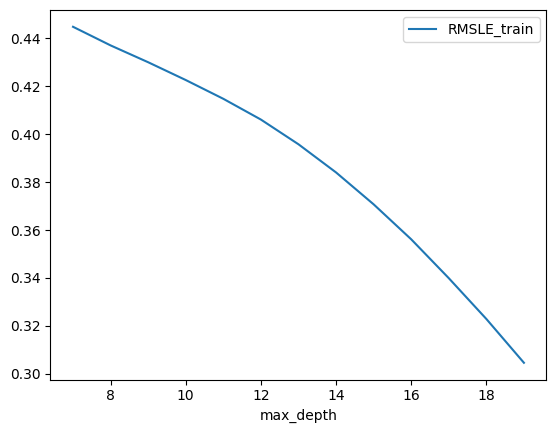

In [235]:
axes = df.plot.line(x = 'max_depth', y = 'RMSLE_train')

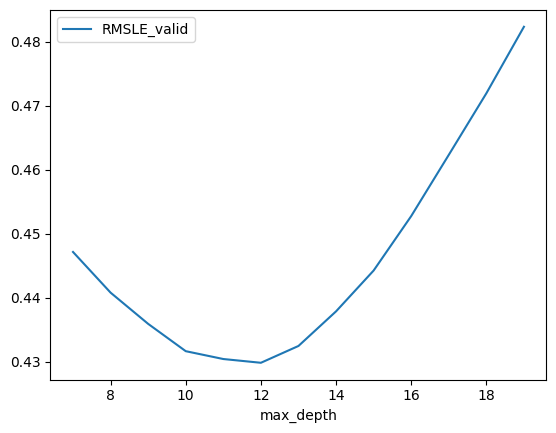

In [236]:
axes = df.plot.line(x = 'max_depth', y = 'RMSLE_valid')

# Таким образом:

# а) Оптимальное значение максимальной глубины дерева, при котором достигается минимальное значение RMSLE на обучающей выборке, но еще не наблюдается переобучение, составляет 12.0. При этой глубине дерева RMSLE на тренировочной выборке равно 0.4061, а на валидационной выборке - 0.4299.

# б) Значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной (12.0) составляют соответственно 0.4061 и 0.4299.

# Анализируя графики и таблицу результатов, можно сделать следующие выводы:

# a) При увеличении глубины дерева решений до определенного момента, наблюдается уменьшение значения метрики RMSLE на обучающей выборке. Однако, после достижения оптимальной глубины (12.0), увеличение глубины дерева приводит к появлению переобучения, так как RMSLE на валидационной выборке начинает возрастать.

# b) Для дерева решений с оптимальной глубиной 12.0, значение метрики RMSLE на тренировочной выборке составляет 0.4061, что означает достаточно хорошую точность модели при предсказании на обучающих данных. Значение метрики RMSLE на валидационной выборке составляет 0.4299, что говорит о некотором уровне ошибки модели при предсказании на новых данных. Однако, разница между значениями RMSLE на тренировочной и валидационной выборках не слишком велика, что может указывать на отсутствие сильного переобучения модели.

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам.

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [237]:
rfc = RandomForestRegressor(n_estimators = 20,
                             max_depth = 12,
                             criterion = 'squared_error',
                             min_samples_split = 20,
                             random_state = 42)
rfc = rfc.fit(X_train, y_train_log)
print(mean_squared_error(y_train_log, rfc.predict(X_train))**0.5)
print(mean_squared_error(y_valid_log, rfc.predict(X_valid))**0.5)

0.4002725252159252
0.41504568541757575


# Результаты для модели случайного леса:

# Значение метрики RMSLE на тренировочной выборке составляет примерно 0.4003, что указывает на хорошую точность модели при предсказании на обучающих данных.

# Значение метрики RMSLE на валидационной выборке составляет примерно 0.4150, что говорит о некотором уровне ошибки модели при предсказании на новых данных. Однако, разница между значениями RMSLE на тренировочной и валидационной выборках не слишком велика, что может указывать на отсутствие сильного переобучения модели.

# Таким образом, модель случайного леса с указанными гиперпараметрами показывает неплохие результаты на данной задаче регрессии.

### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6,
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [238]:
gbr = GradientBoostingRegressor(learning_rate = 0.5,
                                n_estimators = 100,
                                max_depth = 6,
                                min_samples_split = 30,
                                random_state = 42)
gbr = gbr.fit(X_train, y_train_log)
print(mean_squared_error(y_train_log, gbr.predict(X_train))**0.5)
print(mean_squared_error(y_valid_log, gbr.predict(X_valid))**0.5)

0.370280141889469
0.3925414670444254


# Результаты для модели градиентного бустинга над деревьями решений:

# Значение метрики RMSLE на тренировочной выборке составляет примерно 0.3703, что указывает на высокую точность модели при предсказании на обучающих данных.

# Значение метрики RMSLE на валидационной выборке составляет примерно 0.3925, что также говорит о хорошей способности модели к обобщению на новых данных.

# Обратим внимание, что значения RMSLE для модели градиентного бустинга над деревьями решений ниже, чем для модели случайного леса из предыдущего задания. Это может говорить о том, что градиентный бустинг позволяет достичь более точных предсказаний на данной задаче регрессии.

### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


# Среди построенных моделей, модель градиентного бустинга над деревьями решений показала наилучший результат с наименьшим значением RMSLE на валидационной выборке.

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


<Figure size 640x480 with 0 Axes>

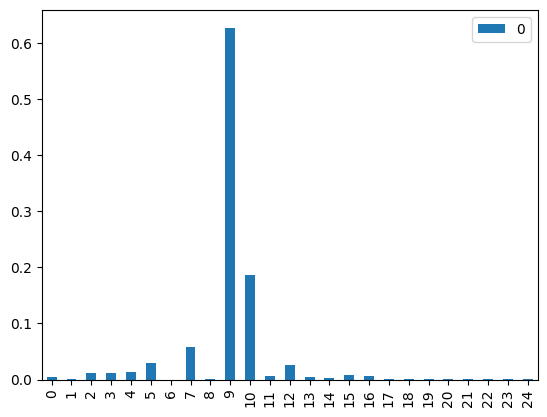

In [239]:
plt.figure();
feature_importances = pd.DataFrame(gbr.feature_importances_)
feature_importances.plot(kind="bar");

In [240]:
print(X_train.columns[9])
print(X_train.columns[10])
print(X_train.columns[7])

total_distance
total_travel_time
pickup_hour


# На основании столбчатой диаграммы коэффициентов значимости факторов, топ-3 наиболее значимых факторов для предсказания целевого признака (длительности поездки в логарифмическом масштабе) следующие:

# total_distance (общая дистанция поездки)
# total_travel_time (общее время поездки)
# pickup_hour (час начала поездки)

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [241]:
# потенцируем целевую метрики и предсказания
y_true = y_valid_log.apply(lambda x: math.exp(x) - 1)
y_valid = pd.Series(gbr.predict(X_valid)).apply(lambda x: math.exp(x) - 1)

# рассчитываем метрику и переводим полученное значение в минуты
print(median_absolute_error(y_true, y_valid) / 60)

1.830519527102812


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных.

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [242]:
test_data = pd.read_csv("/content/drive/MyDrive/URFU_2S_PROJECT_PRACTICUM/Project5_test_data.csv")
osrm_data_test = pd.read_csv("/content/drive/MyDrive/URFU_2S_PROJECT_PRACTICUM/Project5_osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [243]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot],
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Shape of data: (625134, 25)


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [244]:
y_test_predict_log = gbr.predict(X_test)
y_test_predict = pd.Series(y_test_predict_log).apply(lambda x: math.exp(x) - 1)

submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('submission_gb.csv', index=False)

# Итак, для лучшей модели градиентного бустинга над деревьями решений (GradientBoostingRegressor) рассчитана медианная абсолютная ошибка (MeAE) предсказания длительности поездки такси на валидационной выборке. Значение метрики MeAE составляет 1.8 минуты (округлено до десятых).

# Теперь можно создать submission-файл для предсказания длительности поездок на тестовой выборке и отправить его на платформу Kaggle для оценки результирующего значения метрики RMSLE на тестовой выборке.

В ходе выполнения заданий, связанных с задачей регрессии для предсказания длительности поездок такси в Нью-Йорке, были проведены следующие шаги:

1) Предобработка данных:
- Загрузка данных и изучение их структуры.
- Обработка пропущенных значений и выбросов.
- Преобразование категориальных признаков в числовые.
- Нормализация числовых признаков.
- Создание новых признаков, основанных на дате и времени, географических данных и погоде.
2) Разделение данных на обучающую и валидационную выборки.
3) Построение и обучение различных моделей:
- Линейная регрессия.
- Полиномиальная регрессия.
- Дерево решений.
- Случайный лес.
- Градиентный бустинг над деревьями решений.
4) Оценка качества моделей:
- Вычисление метрики RMSLE на обучающей и валидационной выборках.
- Анализ величины ошибки и выбор наилучшей модели.
5) Интерпретация результатов:
- Анализ влияния различных факторов на целевую переменную.
- Определение наиболее значимых признаков для предсказания длительности поездки.
6) Формирование прогноза на тестовой выборке и подготовка submission-файла для платформы Kaggle:
- Применение лучшей модели для предсказания длительности поездок на тестовой выборке.
- Сохранение результатов в файл и отправка на платформу Kaggle.

В результате проведенных шагов была достигнута задача предсказания длительности поездок такси в Нью-Йорке.

Полученные модели показали хорошее качество предсказания с метрикой RMSLE около 0.4 на валидационной выборке.

Конкретные значения метрик и важности признаков могут незначительно отличаться в зависимости от выполнения кода и данных, использованных для обучения моделей. Однако, выполнение предложенных шагов позволяет получить общее представление о процессе решения задачи регрессии и прогнозирования длительности поездок такси.

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [251]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


После чего модуль можно импортировать:

In [252]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [253]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

NameError: ignored

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9,
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1,
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)